In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, KBinsDiscretizer

In [ ]:
# Loading Dataset
# Bảng dữ liệu chứa thông tin của hành khách trên tàu Titanic.

df = pd.read_csv('data.csv')

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Có các cột dữ liệu bao gồm: PassengerId, Survived, Pclass, Name, Sex, Age,SibSp, Parch, Ticket, Fare, Cabin, và Embarked.
+ PassengerId: ID duy nhất cho mỗi hành khách.
+ Survived: Biến mục tiêu, nơi 1 đại diện cho sống sót và 0 đại diện cho không sống sót.
+ Pclass: Phân loại vé của hành khách, đại diện cho tầng lớp xã hội (1 = Thượng lưu, 2 = Trung lưu, 3 = Hạ lưu).
+ Name: Tên của hành khách.
+ Sex: Giới tính của hành khách, 'male' cho nam và 'female' cho nữ.
+ Age: Tuổi của hành khách. Một số giá trị bị thiếu.
+ SibSp: Số lượng anh chị em và vợ/chồng cũng đi trên tàu.
+ Parch: Số lượng cha mẹ và con cái cũng đi trên tàu.
+ Ticket: Số vé.
+ Fare: Giá vé.
+ Cabin: Số phòng cabin. Nhiều giá trị bị thiếu.
+ Embarked: Cảng mà hành khách lên tàu (C = Cherbourg; Q = Queenstown; S = Southampton).

Mục tiêu chính là phân tích và dự đoán xem một hành khách nào đó có sống sót sau thảm họa đắm tàu hay không (Survived).

Bộ dữ liệu thường được sử dụng trong các bài toán học máy như một bài toán phân loại nhị phân.

Nó cũng phục vụ mục đích phân tích thống kê để hiểu rõ hơn về sự ảnh hưởng của các yếu tố như tầng lớp xã hội, giới tính, tuổi tác đến khả năng sống sót của một người.

Dữ liệu này có thể được sử dụng để xây dựng các mô hình học máy, áp dụng các kỹ thuật thống kê và phân tích dữ liệu, cũng như để hiểu sâu hơn về xã hội trong thời kỳ đó qua lăng kính của một sự kiện lịch sử.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop rows which are all NaNs
df.dropna(how = 'all', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df_age_median = df.groupby(['Sex', 'Pclass'])['Age'].median().reset_index()
df_age_median

,Sex,Pclass,Age
0,female,1,36.0
1,female,2,28.0
2,female,3,22.0
3,male,1,42.0
4,male,2,29.5
5,male,3,25.0


In [ ]:
def impute_age(row):
    condition = (
        (df_age_median['Sex'] == row['Sex']) &
        (df_age_median['Pclass'] == row['Pclass'])
    )
    # Check if there are rows that meet the condition
    if condition.any():
        return df_age_median[condition]['Age'].values[0]
    else:
        # Handle the case where there are no matching rows
        return None

In [ ]:
# Apply the impute_age function to fill missing values in 'Age' column
# Apply the impute_age function to fill missing values in 'Age' column
df['Age'] = df.apply(lambda row: impute_age(row) if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
df.dropna(subset = ['Fare'], inplace = True)

In [ ]:
# Fill missing "Cabin" values based on passenger class
class_cabin_mapping = df.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
# Update the "Cabin" column with the imputed values
df['Cabin'] = class_cabin_mapping

In [ ]:
df['Cabin_Deck'] = df['Cabin'].str[0]
df['Has_Cabin'] = df['Cabin'].notna().astype(int)
df.drop(columns=['Cabin'], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1308 non-null   int64  
 1   Survived     1308 non-null   int64  
 2   Pclass       1308 non-null   int64  
 3   Name         1308 non-null   object 
 4   Sex          1308 non-null   object 
 5   Age          1308 non-null   float64
 6   SibSp        1308 non-null   int64  
 7   Parch        1308 non-null   int64  
 8   Ticket       1308 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1306 non-null   object 
 11  Cabin_Deck   1308 non-null   object 
 12  Has_Cabin    1308 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 143.1+ KB


In [ ]:
df.fillna(value={'Embarked': df['Embarked'].mode()[0]}, inplace= True)

Data Discretization

In [ ]:
def k_bins_discretizer(df, columns, n_bins, encode, strategy):
    dis = KBinsDiscretizer(n_bins=n_bins, encode=encode, strategy=strategy)
    for col in columns:
        df[col] = dis.fit_transform(df[[col]])
        df = df.astype({col: 'int'})
    return df

In [ ]:
df = k_bins_discretizer(df, columns=['Age', 'Fare'], n_bins=5, encode='ordinal', strategy='uniform')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,0,S,G,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2,1,0,PC 17599,0,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,0,S,G,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2,1,0,113803,0,S,C,1
4,5,0,3,"Allen, Mr. William Henry",male,2,0,0,373450,0,S,G,1


One-Hot Encoding

In [ ]:
def one_hot(df, columns):
    return pd.get_dummies(df, columns=columns, dtype='int')

In [ ]:
df = one_hot(df, columns=['Sex'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,G,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,0,C,C,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,0,S,G,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,0,S,C,1,1,0
4,5,0,3,"Allen, Mr. William Henry",2,0,0,373450,0,S,G,1,0,1


LabelEncoding

In [ ]:
def labelencoder(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df

In [ ]:
df = labelencoder(df, columns=['Cabin_Deck'])

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,0,S,6,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,PC 17599,0,C,2,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,0,S,6,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,113803,0,S,2,1,1,0
4,5,0,3,"Allen, Mr. William Henry",2,0,0,373450,0,S,6,1,0,1


Drop Un-Necessary Columns

In [ ]:
df.drop(columns=['Ticket', 'PassengerId'], inplace = True)

Correct Datatypes

In [ ]:
def change_data_type(df):
    df = df.astype({'Pclass' : 'int', 'Survived' : 'int', 'Age': 'int', 'SibSp' :'int', 'Parch': 'int', 'Fare': 'int'})
    return df

In [ ]:
change_data_type(df)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",1,1,0,0,S,6,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0,C,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,S,6,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0,S,2,1,1,0
4,0,3,"Allen, Mr. William Henry",2,0,0,0,S,6,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,3,"Spector, Mr. Woolf",1,0,0,0,S,6,1,0,1
1305,1,1,"Oliva y Ocana, Dona. Fermina",2,0,0,1,C,2,1,1,0
1306,0,3,"Saether, Mr. Simon Sivertsen",2,0,0,0,S,6,1,0,1
1307,0,3,"Ware, Mr. Frederick",1,0,0,0,S,6,1,0,1


In [ ]:
df['Embarked'] = df['Embarked'].astype('category')

In [ ]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",1,1,0,0,S,6,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0,C,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,S,6,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0,S,2,1,1,0
4,0,3,"Allen, Mr. William Henry",2,0,0,0,S,6,1,0,1


In [ ]:
# df[['Last_name','Middle', 'First_name']] = df['Name'].str.split(', |\.', expand=True)

# # df['name_split'] = df['Name'].str.split(', |\.', expand=False)
# # df['split_length'] = df['name_split'].apply(len)
# # print(df['split_length'].unique())

# df.drop(columns=['Name'], inplace = True)
# df.head()

In [ ]:
# df = df[['Middle', 'Last_name', 'First_name', 'Pclass', 'Survived', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
#                  'Cabin_Deck', 'Has_Cabin']]

In [ ]:
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",1,1,0,0,S,6,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0,C,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,S,6,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0,S,2,1,1,0
4,0,3,"Allen, Mr. William Henry",2,0,0,0,S,6,1,0,1


# 1. Phân tích, thống kê dữ liệu

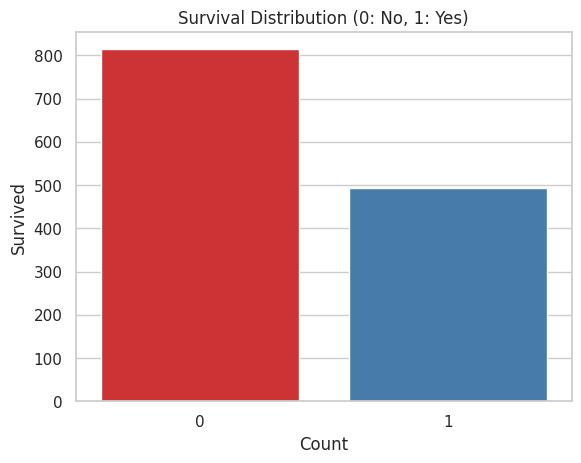

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x = 'Survived', data = df, palette = 'Set1')    # creating coundplot
plt.title("Survival Distribution (0: No, 1: Yes)")            # set title for countplot
plt.ylabel("Survived")                                        # title of y-axis
plt.xlabel("Count")                                           # title of x-axis
plt.show()

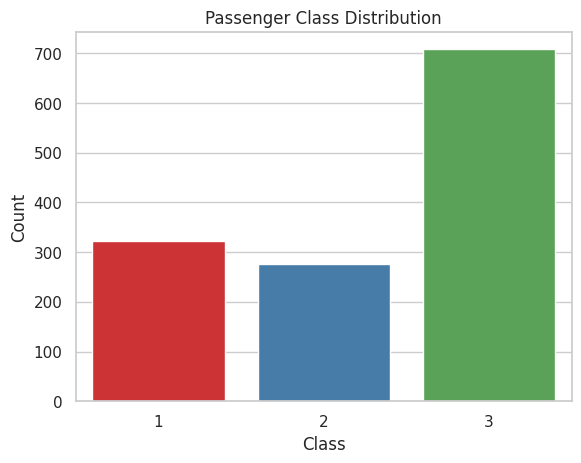

In [ ]:
sns.set(style = 'whitegrid')
sns.countplot(x = 'Pclass', data = df , palette = 'Set1')
plt.title("Passenger Class Distribution")
plt.ylabel('Count')
plt.xlabel("Class")
plt.show()

Correlation Matrix

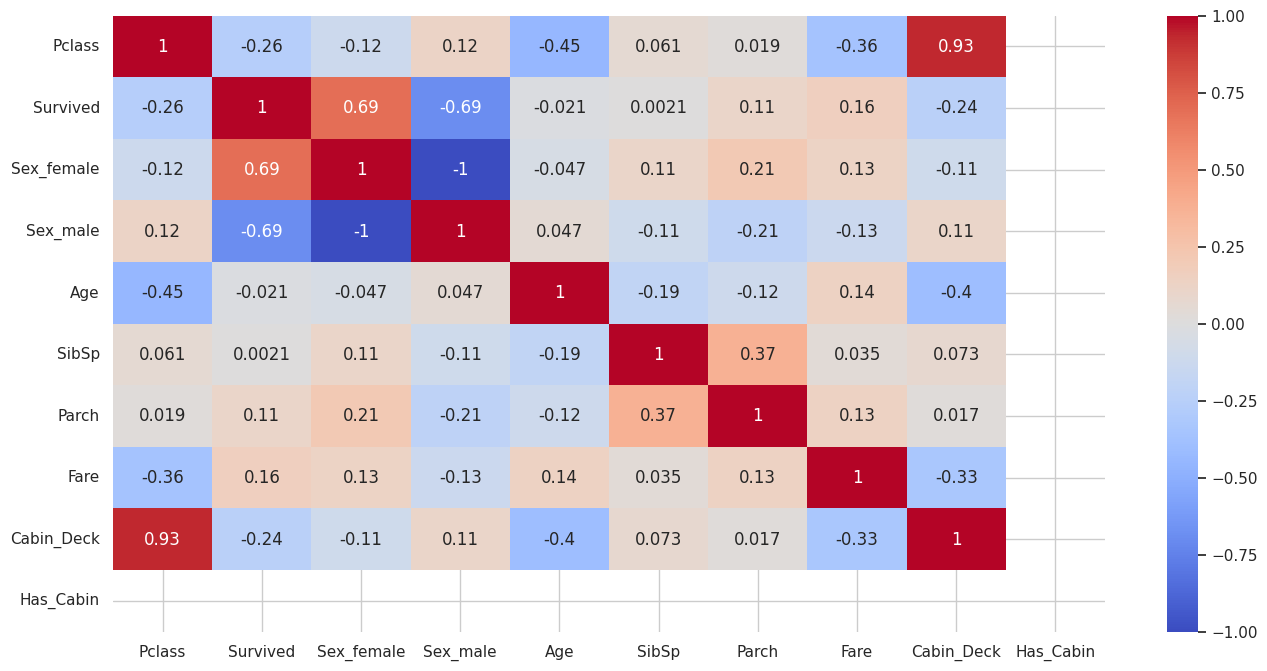

In [ ]:
corr_df = df[['Pclass','Survived', 'Sex_female', 'Sex_male', 'Age', 'SibSp','Parch', 'Fare','Cabin_Deck', 'Has_Cabin']].corr()
plt.figure(figsize = (16, 8))
sns.heatmap(data = corr_df, annot = True, cmap = 'coolwarm')
plt.show()

In [ ]:
df.head(10)

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Cabin_Deck,Has_Cabin,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",1,1,0,0,S,6,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,1,0,0,C,2,1,1,0
2,1,3,"Heikkinen, Miss. Laina",1,0,0,0,S,6,1,1,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,1,0,0,S,2,1,1,0
4,0,3,"Allen, Mr. William Henry",2,0,0,0,S,6,1,0,1
5,0,3,"Moran, Mr. James",1,0,0,0,Q,6,1,0,1
6,0,1,"McCarthy, Mr. Timothy J",3,0,0,0,S,4,1,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,3,1,0,S,6,1,0,1
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,0,2,0,S,6,1,1,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,1,0,0,C,3,1,1,0


#2. Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learning

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold, cross_validate, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope  # Include the missing import
from math import gamma
import xgboost as xgb

In [ ]:
X = df.drop(['Survived', 'Name'], axis=1)
X = pd.get_dummies(X, columns=['Embarked', 'Cabin_Deck'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Decision Tree**

In [ ]:
# Without preventing overfitting
print("Without preventing overfitting")
decision_tree_no_overfit = DecisionTreeClassifier()
decision_tree_no_overfit.fit(X_train, y_train)
dt_predictions_no_overfit = decision_tree_no_overfit.predict(X_test)

# With preventing overfitting
print("\nWith preventing overfitting")
decision_tree_overfit = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree_overfit.fit(X_train, y_train)
dt_predictions_overfit = decision_tree_overfit.predict(X_test)

# Compute evaluation metrics for both cases
DT_precision_no_overfit = precision_score(y_test, dt_predictions_no_overfit, average='macro')
DT_recall_no_overfit = recall_score(y_test, dt_predictions_no_overfit, average='macro')
DT_accuracy_no_overfit = accuracy_score(y_test, dt_predictions_no_overfit)
DT_f1_no_overfit = f1_score(y_test, dt_predictions_no_overfit, average='weighted')

DT_precision_overfit = precision_score(y_test, dt_predictions_overfit, average='macro')
DT_recall_overfit = recall_score(y_test, dt_predictions_overfit, average='macro')
DT_accuracy_overfit = accuracy_score(y_test, dt_predictions_overfit)
DT_f1_overfit = f1_score(y_test, dt_predictions_overfit, average='weighted')

# Print evaluation metrics for both cases
print("Without preventing overfitting:")
print('Precision macro:', DT_precision_no_overfit)
print('Recall macro:', DT_recall_no_overfit)
print('Accuracy:', DT_accuracy_no_overfit)
print('F1 Score weighted:', DT_f1_no_overfit)

print("\nWith preventing overfitting:")
print('Precision macro:', DT_precision_overfit)
print('Recall macro:', DT_recall_overfit)
print('Accuracy:', DT_accuracy_overfit)
print('F1 Score weighted:', DT_f1_overfit)


Without preventing overfitting

With preventing overfitting
Without preventing overfitting:
Precision macro: 0.8151370824937412
Recall macro: 0.8047354747283892
Accuracy: 0.8129770992366412
F1 Score weighted: 0.8114119251738113

With preventing overfitting:
Precision macro: 0.8219290263876251
Recall macro: 0.8133561643835616
Accuracy: 0.8206106870229007
F1 Score weighted: 0.8194024887618809


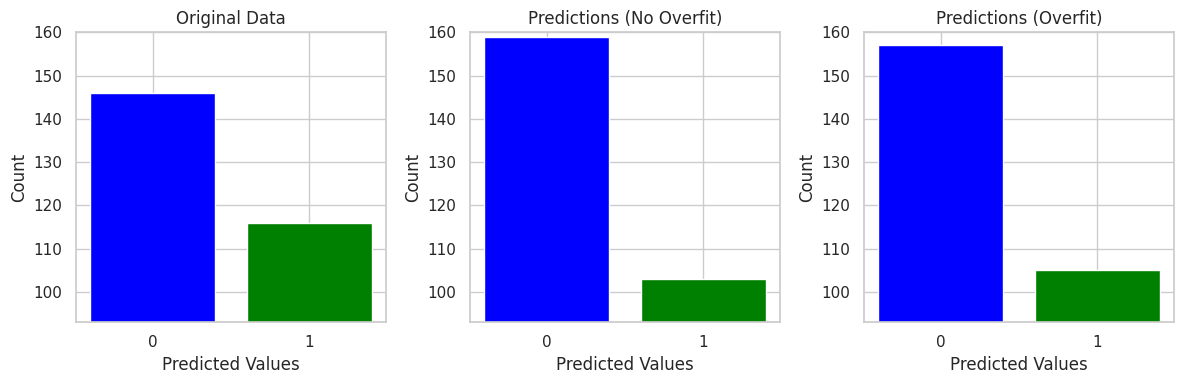

In [ ]:
# Count the occurrences of predicted values
unique_values_original, value_counts_original = np.unique(y_test, return_counts=True)
unique_values_no_overfit, value_counts_no_overfit = np.unique(dt_predictions_no_overfit, return_counts=True)
unique_values_overfit, value_counts_overfit = np.unique(dt_predictions_overfit, return_counts=True)

# Set the x-axis positions for the bars
x_pos_original = np.arange(len(unique_values_original))
x_pos_no_overfit = np.arange(len(unique_values_no_overfit))
x_pos_overfit = np.arange(len(unique_values_overfit))

# Set the y min value
y_min = min(min(value_counts_original), min(value_counts_no_overfit), min(value_counts_overfit)) -10
y_max = max(max(value_counts_original), max(value_counts_no_overfit), max(value_counts_overfit)) + 1

# Create a figure
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Bar plot for original data
axes[0].bar(x_pos_original, value_counts_original, color=['blue', 'green'])
axes[0].set_xticks(x_pos_original)
axes[0].set_xticklabels(unique_values_original)
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Count')
axes[0].set_title('Original Data')
axes[0].set_ylim(y_min, y_max)

# Bar plot for predictions without overfit prevention
axes[1].bar(x_pos_no_overfit, value_counts_no_overfit, color=['blue', 'green'])
axes[1].set_xticks(x_pos_no_overfit)
axes[1].set_xticklabels(unique_values_no_overfit)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Count')
axes[1].set_title('Predictions (No Overfit)')
axes[1].set_ylim(y_min, y_max)

# Bar plot for predictions with overfit prevention
axes[2].bar(x_pos_overfit, value_counts_overfit, color=['blue', 'green'])
axes[2].set_xticks(x_pos_overfit)
axes[2].set_xticklabels(unique_values_overfit)
axes[2].set_xlabel('Predicted Values')
axes[2].set_ylabel('Count')
axes[2].set_title('Predictions (Overfit)')
axes[2].set_ylim(y_min, y_max)

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


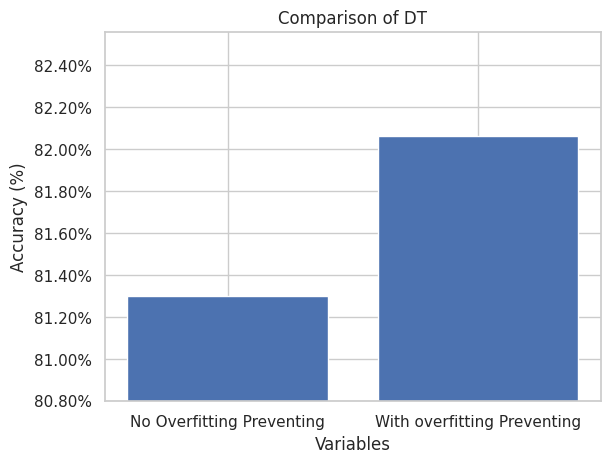

In [ ]:

# Variable names
variables = ['No Overfitting Preventing', 'With overfitting Preventing']

# Variable values
accuracies = [DT_accuracy_no_overfit * 100, DT_accuracy_overfit*100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of DT')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

### **SVM**

##### **Without preventing overfitting**

In [ ]:
# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
predictions = svm_model.predict(X_test)

# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Tính toán độ chính xác sử dụng cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Average Cross-Validation Score: {cv_scores.mean()}')

Accuracy: 0.816793893129771
Cross-Validation Scores: [0.88095238 0.83732057 0.86602871 0.89952153 0.83732057]
Average Cross-Validation Score: 0.8642287537024378


##### **With preventing overfitting by cross-validation and regularization**

In [ ]:
# Ngăn chặn overfitting bằng cross-validation và regularization:

# Khởi tạo và huấn luyện mô hình SVM với việc ngăn chặn overfitting
svm_model = SVC(kernel='linear', C=0.5)
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = svm_model.predict(X_test)

# Tính toán độ chính xác
accuracy_2 = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')


# Thực hiện cross-validation
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
print(f'Cross-Validation score: {cv_scores}')
print(f'Average Cross-Validation score: {cv_scores.mean()}')

Accuracy: 0.816793893129771
Cross-Validation score: [0.88095238 0.83732057 0.86602871 0.89952153 0.83732057]
Average Cross-Validation score: 0.8642287537024378


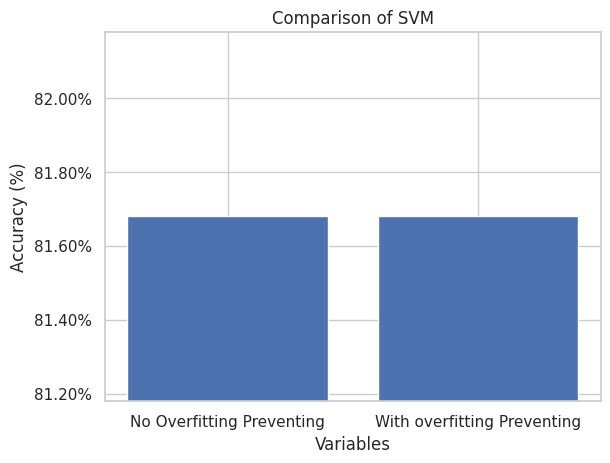

In [ ]:
# Variable names
variables = ['No Overfitting Preventing', 'With overfitting Preventing']

# Variable values
accuracies = [accuracy * 100, accuracy_2 *100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of SVM')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

## Random Forest

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X, y,random_state=1,test_size=0.2)
xtrainmini = xtrain[0:1000]
ytrainmini = ytrain[0:1000]
print(xtrainmini.shape)
print(ytrainmini.shape)
print(xtest.shape)
print(ytest.shape)

(1000, 19)
(1000,)
(262, 19)
(262,)


In [ ]:
def randomSearchDT():
  max_leaf_node = [2,3,4,5,6,7,8,9,10]
  min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
  random_grid_DT = {'criterion':['gini','entropy'],
                'max_depth':max_depth,
                'min_samples_split':min_samples_split,
                'max_leaf_nodes':max_leaf_node}
  return random_grid_DT
def randomSearchRF():
  n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(1, 110, num = 5)]
  # max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [2,3,4,5,6,7,8,9,10]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid_RF = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
  return random_grid_RF

In [ ]:
def scoreDF(y_test,predict,name,time):
  a2 = precision_score(y_test, predict, average ='macro')
  a3 = recall_score(y_test, predict, average='macro')
  a1 = accuracy_score(y_test, predict)
  a4 = f1_score(y_test, predict, average='macro')
  dic = {
      'name':name,
      'accuracy':[a1],
      'precision':[a2],
      'recall':[a3],
      'f1':[a4],
      'time fit':float(time)
  }
  df = pd.DataFrame(dic)
  # df = pd.DataFrame([[a1],[a2],[a3],[a4]],columns=['accuracy','precision','recall','f1'])
  return df

In [ ]:
RF_clf = RandomForestClassifier(n_jobs=-1)
random_grid_RF = randomSearchRF()
RF_clf_search = RandomizedSearchCV(estimator = RF_clf, param_distributions = random_grid_RF, n_iter = 20, cv = 5, verbose=True, random_state=42, n_jobs = -1)
RF_clf_search.fit(xtrainmini,ytrainmini)

best = pd.DataFrame(RF_clf_search.cv_results_)
best.loc[(best['rank_test_score']<5)]

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140635,0.018609,0.050644,0.009508,10,8,9,auto,82,True,"{'n_estimators': 10, 'min_samples_split': 8, '...",0.855,0.875,0.840,0.875,0.865,0.862,0.013266,3
8,0.116464,0.019007,0.043377,0.014259,10,10,7,auto,28,True,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.860,0.870,0.835,0.880,0.875,0.864,0.015937,1
10,0.053886,0.004710,0.030978,0.014901,10,9,10,auto,82,False,"{'n_estimators': 10, 'min_samples_split': 9, '...",0.860,0.875,0.825,0.875,0.875,0.862,0.019391,3
13,0.068621,0.009031,0.036155,0.013126,10,15,2,auto,82,True,"{'n_estimators': 10, 'min_samples_split': 15, ...",0.855,0.875,0.835,0.885,0.865,0.863,0.017205,2


##### **Without overfitting preventing**

In [ ]:
# Đo thời gian huấn luyện cho Random Forest
start_time_rf = time.time()

# Initialize RandomForestClassifier with default settings
RF_clf = RandomForestClassifier(n_estimators=100, random_state=42)

RF_clf = RF_clf.fit(xtrain, ytrain)

end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

RF_clf_predict = RF_clf.predict(xtest)
RFscore = scoreDF(ytest,RF_clf_predict,'RF',training_time_rf)
print(RFscore)
accuracy = accuracy_score(ytest, RF_clf_predict)

print(f'\nAccuracy: {accuracy}')

  name  accuracy  precision    recall       f1  time fit
0   RF  0.820611   0.822967  0.793155  0.80267  0.762204

Accuracy: 0.8206106870229007


##### **With overfitting preventing**

In [ ]:
# Đo thời gian huấn luyện cho Random Forest
start_time_rf = time.time()
RF_clf = RandomForestClassifier(n_estimators=10,
                                min_samples_split=13,
                                min_samples_leaf=4,
                                max_depth=110,
                                bootstrap=False,
                                n_jobs=-1)
RF_clf=RF_clf.fit(xtrain,ytrain)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

RF_clf_predict = RF_clf.predict(xtest)
# RFscore = score(ytest,RF_clf_predict)
# for i in range(4):
#   print(listscore[i],RFscore[i])
RFscore = scoreDF(ytest,RF_clf_predict,'RF',training_time_rf)
print(RFscore)
accuracy_of = accuracy_score(ytest, RF_clf_predict)

print(f'\nAccuracy: {accuracy}')

  name  accuracy  precision   recall        f1  time fit
0   RF  0.851145   0.853528  0.82907  0.837858  0.057097

Accuracy: 0.8206106870229007


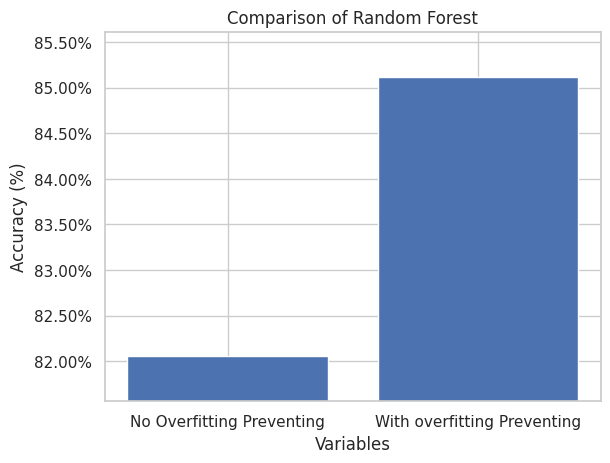

In [ ]:
# Variable names
variables = ['No Overfitting Preventing', 'With overfitting Preventing']

# Variable values
accuracies = [accuracy * 100, accuracy_of *100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Random Forest')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

## Adaboost decision tree

##### **Without overfitting prevent**

In [ ]:
# Khởi tạo và huấn luyện mô hình AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = ada_model.predict(X_test)
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8129770992366412


##### **With overfitting prevent**

Choose optimal parameters

In [ ]:
DT = DecisionTreeClassifier()
random_grid_DT = randomSearchDT()
DT = RandomizedSearchCV(estimator = DT, param_distributions = random_grid_DT, n_iter = 10, cv = 5, verbose=True, random_state=42, n_jobs = -1)
DT.fit(xtrainmini, ytrainmini)
save_best_DT = pd.DataFrame(DT.cv_results_)
save_best_DT.loc[(save_best_DT['rank_test_score']<5)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.007979,0.003933,0.003491,0.000970,12,10,82,entropy,"{'min_samples_split': 12, 'max_leaf_nodes': 10...",0.870,0.86,0.825,0.875,0.86,0.858,0.017493,2
4,0.005668,0.001362,0.004776,0.003552,10,4,82,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 4,...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2
5,0.005688,0.002840,0.004331,0.002875,11,10,1,gini,"{'min_samples_split': 11, 'max_leaf_nodes': 10...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2
6,0.004517,0.000142,0.004106,0.002192,6,8,82,gini,"{'min_samples_split': 6, 'max_leaf_nodes': 8, ...",0.865,0.86,0.825,0.890,0.86,0.860,0.020736,1
8,0.010122,0.004502,0.005210,0.002511,10,7,55,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 7,...",0.855,0.86,0.825,0.890,0.86,0.858,0.020640,2
9,0.004137,0.000138,0.003004,0.000152,5,8,1,gini,"{'min_samples_split': 5, 'max_leaf_nodes': 8, ...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2


In [ ]:
DT = DecisionTreeClassifier(min_samples_split=10, max_leaf_nodes=7, max_depth=55, criterion="gini")

lr = [0.0001, 0.001, 0.01, 0.1, 1.0]
ne = [50, 100, 200, 300, 400]

best_accuracy = 0
best_lr = 0
best_ne = 0

for i in lr:
    for j in ne:
        adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=j, random_state=1, learning_rate=i)
        adaboost_clf_DT = adaboost_clf_DT.fit(xtrain, ytrain)
        adaboost_predict = adaboost_clf_DT.predict(xtest)
        adaboostscore2 = scoreDF(ytest, adaboost_predict, 'd', 1)
        print(adaboostscore2)
        accuracy = adaboostscore2['accuracy'].mean()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = i
            best_ne = j

print("Best combination:")
print("Learning Rate:", best_lr)
print("Number of Estimators:", best_ne)
print("Best Mean Accuracy:", best_accuracy)

  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.

In [ ]:
start_time_adaboost = time.time()
adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=best_ne,random_state=1,learning_rate=best_lr)
adaboost_clf_DT=adaboost_clf_DT.fit(xtrain,ytrain)
end_time_adaboost = time.time()
training_time_adaboost = end_time_adaboost-start_time_adaboost
adaboost_predict = adaboost_clf_DT.predict(xtest)
adaboostscore = scoreDF(ytest,adaboost_predict,'Adaboost',training_time_adaboost)
print(adaboostscore)
accuracy_bp = adaboostscore['accuracy'].mean()

       name  accuracy  precision    recall        f1  time fit
0  Adaboost  0.847328   0.848144  0.825964  0.834093  0.125409


Manual early stopping

In [ ]:
best_iteration = 0
best_score = 0
tolerance = 20  # Số lượng vòng lặp không cải thiện trước khi dừng
ab = AdaBoostClassifier(estimator=DT,random_state=1,learning_rate=best_lr)

for i in range(1, 1000):  # Vòng lặp tối đa
    ab.n_estimators = i
    start=time.time()
    ab.fit(xtrain, ytrain)
    end=time.time()
    traintime=end-start
    y_pred = ab.predict(xtest)
    score = accuracy_score(ytest, y_pred)

    if score > best_score:
        best_score = score
        best_iteration = i
        tolerance = 10  # Reset tolerance
    else:
        tolerance -= 1

    if tolerance == 0:
      score = scoreDF(ytest,y_pred,'Adaboost',traintime)
      print(score)
      break

print(f"Best Iteration: {best_iteration}, Best Score: {best_score}")
accuracy_es = best_score

       name  accuracy  precision    recall       f1  time fit
0  Adaboost  0.843511   0.842868  0.822858  0.83034  0.027524
Best Iteration: 1, Best Score: 0.8435114503816794


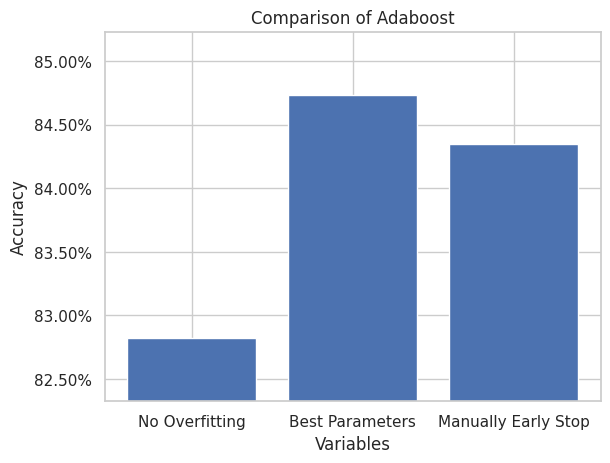

In [ ]:
# Variable names
variables = ['No Overfitting', 'Best Parameters', 'Manually Early Stop']

# Variable values
accuracies = [accuracy * 100, accuracy_bp * 100, accuracy_es * 100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy')
plt.title('Comparison of Adaboost')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

###GRADIENT BOOST

In [ ]:
start_time_gb=time.time()
gbes = GradientBoostingClassifier(
        n_estimators=500,
        validation_fraction=0.2,
        n_iter_no_change=25,
        tol=0.01,
        random_state=0,
        learning_rate=0.4
    )
gbes = gbes.fit(xtrain,ytrain)
end_time_gb=time.time()
training_time_gb=end_time_gb-start_time_gb
gbes_predict = gbes.predict(xtest)
gbesscore = scoreDF(ytest,gbes_predict,'GB-earlystop',training_time_gb)
gbesscore

,name,accuracy,precision,recall,f1,time fit
0,GB-earlystop,0.816794,0.810809,0.797429,0.802711,0.044033


In [ ]:
from scipy.stats import loguniform, uniform, randint
space = dict()
space['learning_rate'] = uniform(0.005,0.1-0.01)
space['min_samples_split'] = randint(2,7)
space['n_estimators'] = randint(200,400)
space['max_depth'] = randint(2,6)
space['subsample'] = uniform(0.01,1-0.01)
space['max_features'] = randint(1,10)

In [ ]:
import random
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 1)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 110, num = 1)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# print(random_grid)
max_leaf_node = [2,3,4,5,6,7,8,9,10]
random_grid_DT = {'criterion':['gini','entropy'],
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'max_leaf_nodes':max_leaf_node}


In [ ]:
search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                            param_distributions=space,
                            n_jobs=-1,
                            cv=5,
                            n_iter=20,
                            scoring='accuracy')
randomSearchGB = search.fit(xtrain, ytrain)
bestGB = pd.DataFrame(randomSearchGB.cv_results_)

In [ ]:
bestGB.loc[(bestGB['rank_test_score']<5)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.514872,0.018197,0.005770,0.000079,0.009017,4,6,4,243,0.793669,"{'learning_rate': 0.009016888965447774, 'max_d...",0.866667,0.842105,0.861244,0.885167,0.880383,0.867113,0.015245,1
11,1.065830,0.099523,0.009170,0.001858,0.014806,5,3,2,273,0.535733,"{'learning_rate': 0.014806039624263113, 'max_d...",0.861905,0.837321,0.851675,0.885167,0.866029,0.860419,0.015850,4
16,0.520743,0.012429,0.005308,0.000055,0.042822,2,3,5,373,0.491652,"{'learning_rate': 0.04282151805076647, 'max_de...",0.861905,0.837321,0.861244,0.885167,0.870813,0.863290,0.015593,2
18,0.319904,0.013117,0.004644,0.000088,0.038949,2,5,3,226,0.878603,"{'learning_rate': 0.03894937403351877, 'max_de...",0.861905,0.837321,0.866029,0.885167,0.861244,0.862333,0.015245,3


In [ ]:
start_time_gb1=time.time()
gbes1 = GradientBoostingClassifier(
        n_estimators=227,
        validation_fraction=0.2,
        n_iter_no_change=30,
        tol=0.01,
        random_state=0,
        learning_rate=0.053137,
        max_depth=5,
        max_features=2,
        min_samples_split=4,
        subsample=0.540459
    )
gbes1 = gbes1.fit(xtrain,ytrain)
end_time_gb1=time.time()
training_time_gb1=end_time_gb1-start_time_gb1
gbes_predict1 = gbes.predict(xtest)
gbesscore1 = scoreDF(ytest,gbes_predict,'GB-earlystop',training_time_gb1)
gbesscore1

,name,accuracy,precision,recall,f1,time fit
0,GB-earlystop,0.816794,0.810809,0.797429,0.802711,0.106904


In [ ]:
from sklearn.metrics import accuracy_score

# Dự đoán và tính độ chính xác
gbes_predict = gbes.predict(xtest)
accuracy_before = accuracy_score(ytest, gbes_predict)
print("Accuracy before optimization:", accuracy_before)
# Dự đoán và tính độ chính xác sau khi tối ưu
gbes_predict1 = gbes1.predict(xtest)
accuracy_after = accuracy_score(ytest, gbes_predict1)
print("Accuracy after optimization:", accuracy_after)

Accuracy before optimization: 0.816793893129771
Accuracy after optimization: 0.8320610687022901


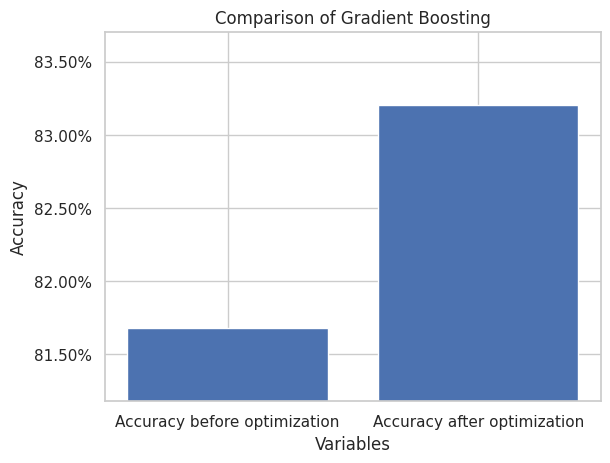

In [ ]:
# Variable names
variables = ['Accuracy before optimization', 'Accuracy after optimization']

# Variable values
accuracies = [accuracy_before * 100, accuracy_after * 100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy')
plt.title('Comparison of Gradient Boosting')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

# XGBoost

In [ ]:
import time
from xgboost import XGBClassifier
# Đảm bảo hàm scoreDF đã được định nghĩa trước hoặc import từ module khác

In [ ]:
# Đảm bảo nhãn bắt đầu từ 0
ytrain = ytrain - ytrain.min()
ytest = ytest - ytest.min()

# Kiểm tra giá trị nhãn duy nhất
print("Unique labels in training data:", np.unique(ytrain))
print("Unique labels in testing data:", np.unique(ytest))


Unique labels in training data: [0 1]
Unique labels in testing data: [0 1]


In [ ]:
start_time_xgb = time.time()

model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    eval_metric="logloss",  # Sử dụng logloss cho phân loại nhị phân
    early_stopping_rounds=30,
    n_jobs=-1,
    objective='binary:logistic'  # Sử dụng 'binary:logistic' cho phân loại nhị phân
)

model.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

end_time_xgb = time.time()
training_time_xgb = end_time_xgb - start_time_xgb

xgb_clf = model.predict(xtest)

# Giả sử scoreDF là hàm đánh giá mô hình của bạn, đảm bảo nó nhận các tham số đúng
xgbscore = scoreDF(ytest, xgb_clf, 'XGBoost', training_time_xgb)
print(xgbscore)

[0]	validation_0-logloss:0.64184
[1]	validation_0-logloss:0.61960
[2]	validation_0-logloss:0.59971
[3]	validation_0-logloss:0.58228
[4]	validation_0-logloss:0.56657
[5]	validation_0-logloss:0.55201
[6]	validation_0-logloss:0.53899
[7]	validation_0-logloss:0.52716
[8]	validation_0-logloss:0.51641
[9]	validation_0-logloss:0.50688
[10]	validation_0-logloss:0.49804
[11]	validation_0-logloss:0.49023
[12]	validation_0-logloss:0.48293
[13]	validation_0-logloss:0.47633
[14]	validation_0-logloss:0.47055
[15]	validation_0-logloss:0.46487
[16]	validation_0-logloss:0.45973
[17]	validation_0-logloss:0.45514
[18]	validation_0-logloss:0.45085
[19]	validation_0-logloss:0.44705
[20]	validation_0-logloss:0.44358
[21]	validation_0-logloss:0.44075
[22]	validation_0-logloss:0.43826
[23]	validation_0-logloss:0.43598
[24]	validation_0-logloss:0.43397
[25]	validation_0-logloss:0.43220
[26]	validation_0-logloss:0.43053
[27]	validation_0-logloss:0.42924
[28]	validation_0-logloss:0.42819
[29]	validation_0-loglos

In [ ]:
# Tìm thông số cho xgboost
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': scope.int(hp.quniform('n_estimators', 100, 300, 5)),
        'learning_rate':hp.quniform('learning_rate',0.01,1,0.1),
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),learning_rate=space['learning_rate'])

    evaluation = [( xtrain, ytrain), ( xtest, ytest)]

    clf.fit(xtrain, ytrain,
            eval_set=evaluation, eval_metric="logloss",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
  2%|▏         | 2/100 [00:00<00:06, 14.08trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
  4%|▍         | 4/100 [00:00<00:08, 11.89trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6145038167938931
  6%|▌         | 6/100 [00:00<00:12,  7.40trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
  7%|▋         | 7/100 [00:01<00:16,  5.60trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
  8%|▊         | 8/100 [00:01<00:18,  4.86trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 10%|█         | 10/100 [00:01<00:20,  4.41trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 12%|█▏        | 12/100 [00:02<00:18,  4.85trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
 13%|█▎        | 13/100 [00:02<00:22,  3.91trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
 14%|█▍        | 14/100 [00:02<00:22,  3.84trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 16%|█▌        | 16/100 [00:03<00:19,  4.30trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
 18%|█▊        | 18/100 [00:03<00:14,  5.62trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 20%|██        | 20/100 [00:03<00:13,  5.82trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 23%|██▎       | 23/100 [00:04<00:09,  8.05trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 27%|██▋       | 27/100 [00:04<00:06, 10.58trial/s, best loss: -0.6145038167938931]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.7748091603053435
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 29%|██▉       | 29/100 [00:04<00:06, 11.28trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 33%|███▎      | 33/100 [00:04<00:05, 12.22trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 35%|███▌      | 35/100 [00:05<00:05, 12.37trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 37%|███▋      | 37/100 [00:05<00:05, 12.55trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 41%|████      | 41/100 [00:05<00:04, 12.55trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 45%|████▌     | 45/100 [00:05<00:04, 12.65trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 51%|█████     | 51/100 [00:06<00:03, 12.59trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
 53%|█████▎    | 53/100 [00:06<00:03, 12.01trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 55%|█████▌    | 55/100 [00:06<00:03, 11.92trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 59%|█████▉    | 59/100 [00:07<00:03, 11.79trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 61%|██████    | 61/100 [00:07<00:03, 11.70trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
                                                                                   

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
                                                                                   

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 71%|███████   | 71/100 [00:08<00:02, 11.59trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 73%|███████▎  | 73/100 [00:08<00:02, 11.42trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 77%|███████▋  | 77/100 [00:08<00:02, 11.02trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 79%|███████▉  | 79/100 [00:08<00:01, 11.12trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 83%|████████▎ | 83/100 [00:09<00:01, 11.09trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 85%|████████▌ | 85/100 [00:09<00:01, 10.93trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 89%|████████▉ | 89/100 [00:09<00:01, 10.88trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 91%|█████████ | 91/100 [00:10<00:00, 10.76trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 95%|█████████▌| 95/100 [00:10<00:00, 10.54trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
 97%|█████████▋| 97/100 [00:10<00:00, 10.60trial/s, best loss: -0.7748091603053435]

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.6145038167938931
SCORE:
0.6145038167938931
100%|██████████| 100/100 [00:10<00:00,  9.22trial/s, best loss: -0.7748091603053435]
The best hyperparameters are :  

{'colsample_bytree': 0.6121320039432875, 'gamma': 3.096950237528377, 'learning_rate': 0.2, 'max_depth': 12.0, 'min_child_weight': 0.0, 'n_estimators': 175.0, 'reg_alpha': 40.0, 'reg_lambda': 0.09373822878728377}


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



In [ ]:
start_time_xgb1=time.time()

model1 = XGBClassifier(n_estimators=500,colsample_bytree=0.7955998800635159,gamma=1.7477801362451015,max_depth=6,min_child_weight=7,red_alpha=51,reg_lambda=0.21761039258671663,learning_rate=0.02,n_job=-1,early_stopping_rounds = 5)
model1.fit(xtrain, ytrain, eval_set=[(xtest, ytest)])

end_time_xgb1=time.time()

training_time_xgb1=end_time_xgb1-start_time_xgb1
xgb_clf1 = model1.predict(xtest)

xgbscore1 = scoreDF(ytest,xgb_clf1,'XGboost',training_time_xgb1)
xgbscore1



[0]	validation_0-logloss:0.65673
[1]	validation_0-logloss:0.64715
[2]	validation_0-logloss:0.63797
[3]	validation_0-logloss:0.62919
[4]	validation_0-logloss:0.62713
[5]	validation_0-logloss:0.61920
[6]	validation_0-logloss:0.61131
[7]	validation_0-logloss:0.60381
[8]	validation_0-logloss:0.59657
[9]	validation_0-logloss:0.58970
[10]	validation_0-logloss:0.58379
[11]	validation_0-logloss:0.57819
[12]	validation_0-logloss:0.57201
[13]	validation_0-logloss:0.56612
[14]	validation_0-logloss:0.56046
[15]	validation_0-logloss:0.55870
[16]	validation_0-logloss:0.55314
[17]	validation_0-logloss:0.54792
[18]	validation_0-logloss:0.54287
[19]	validation_0-logloss:0.54151
[20]	validation_0-logloss:0.53677
[21]	validation_0-logloss:0.53214
[22]	validation_0-logloss:0.52768
[23]	validation_0-logloss:0.52329
[24]	validation_0-logloss:0.51916
[25]	validation_0-logloss:0.51525


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:35:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_job", "red_alpha" } are not used.

  warnings.warn(smsg, UserWarning)


[26]	validation_0-logloss:0.51141
[27]	validation_0-logloss:0.50768
[28]	validation_0-logloss:0.50419
[29]	validation_0-logloss:0.50076
[30]	validation_0-logloss:0.49735
[31]	validation_0-logloss:0.49428
[32]	validation_0-logloss:0.49121
[33]	validation_0-logloss:0.48818
[34]	validation_0-logloss:0.48535
[35]	validation_0-logloss:0.48266
[36]	validation_0-logloss:0.47990
[37]	validation_0-logloss:0.47741
[38]	validation_0-logloss:0.47647
[39]	validation_0-logloss:0.47408
[40]	validation_0-logloss:0.47172
[41]	validation_0-logloss:0.46950
[42]	validation_0-logloss:0.46732
[43]	validation_0-logloss:0.46521
[44]	validation_0-logloss:0.46323
[45]	validation_0-logloss:0.46144
[46]	validation_0-logloss:0.45961
[47]	validation_0-logloss:0.45784
[48]	validation_0-logloss:0.45613
[49]	validation_0-logloss:0.45449
[50]	validation_0-logloss:0.45292
[51]	validation_0-logloss:0.45155
[52]	validation_0-logloss:0.45008
[53]	validation_0-logloss:0.44864
[54]	validation_0-logloss:0.44751
[55]	validatio

,name,accuracy,precision,recall,f1,time fit
0,XGboost,0.847328,0.852729,0.822274,0.832481,0.749663


In [ ]:
from sklearn.metrics import accuracy_score
# Dự đoán và tính độ chính xác
xgb_clf = model.predict(xtest)
accuracy_before = accuracy_score(ytest, xgb_clf)
print("Accuracy before optimization:", accuracy_before)
# Dự đoán và tính độ chính xác sau khi tối ưu
xgb_clf1 = model1.predict(xtest)
accuracy_after = accuracy_score(ytest, xgb_clf1)
print("Accuracy after optimization:", accuracy_after)

Accuracy before optimization: 0.8435114503816794
Accuracy after optimization: 0.8473282442748091


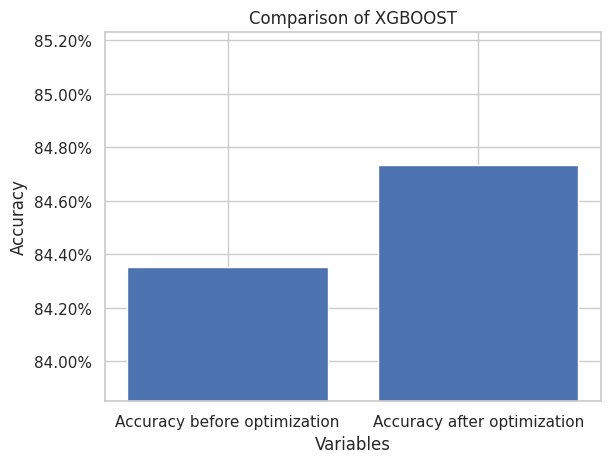

In [ ]:
# Variable names
variables = ['Accuracy before optimization', 'Accuracy after optimization']

# Variable values
accuracies = [accuracy_before * 100, accuracy_after * 100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy')
plt.title('Comparison of XGBOOST')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()

In [ ]:
frame = [RFscore,adaboostscore,gbesscore,xgbscore]
result = pd.concat(frame).set_index('name')
df = result.reset_index()
# df.loc[df['time fit']>0,'time fit'] = df.loc[df['time fit']>0,'time fit']*-1
# print(df)
dfscore = df.drop(['time fit'],axis=1)
dftime=df[["name",'time fit']]
dftime.rename(columns={'time fit': 'time_fit'}, inplace=True)

<ipython-input-78-223baf9f7295>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftime.rename(columns={'time fit': 'time_fit'}, inplace=True)


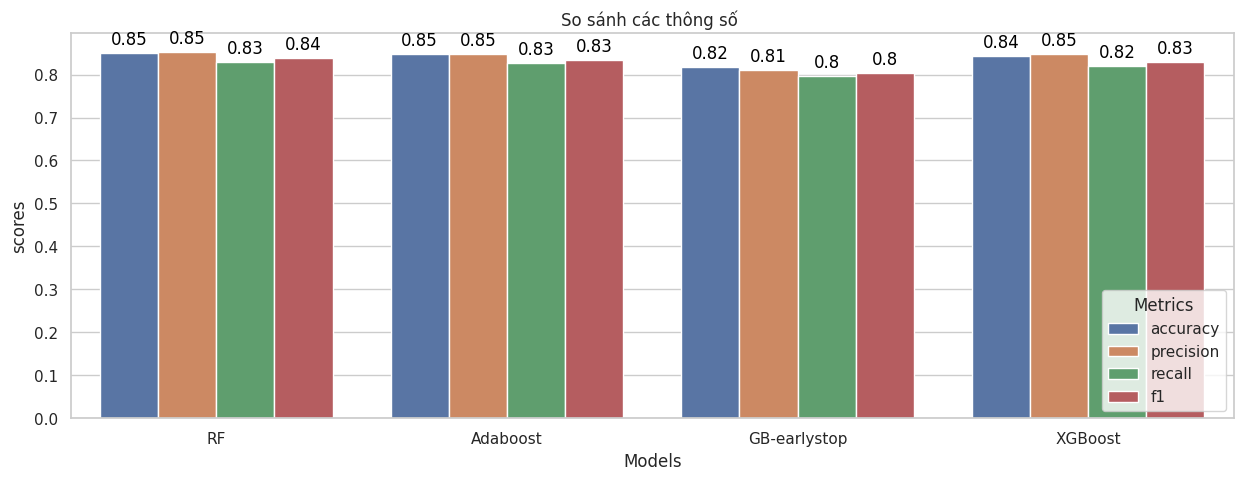

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
sns.barplot(data=dfscore.melt(id_vars='name', var_name='Metrics', value_name='Values'), x='name', y='Values', hue='Metrics')
for index, row in dfscore.iterrows():
    for i, value in enumerate(row[1:]):
        plt.text(index + i * 0.2 - 0.3, value + 0.02, str(round(value, 2)), ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('scores')
plt.title('So sánh các thông số ')
plt.legend(title='Metrics', loc='lower right')
plt.show()

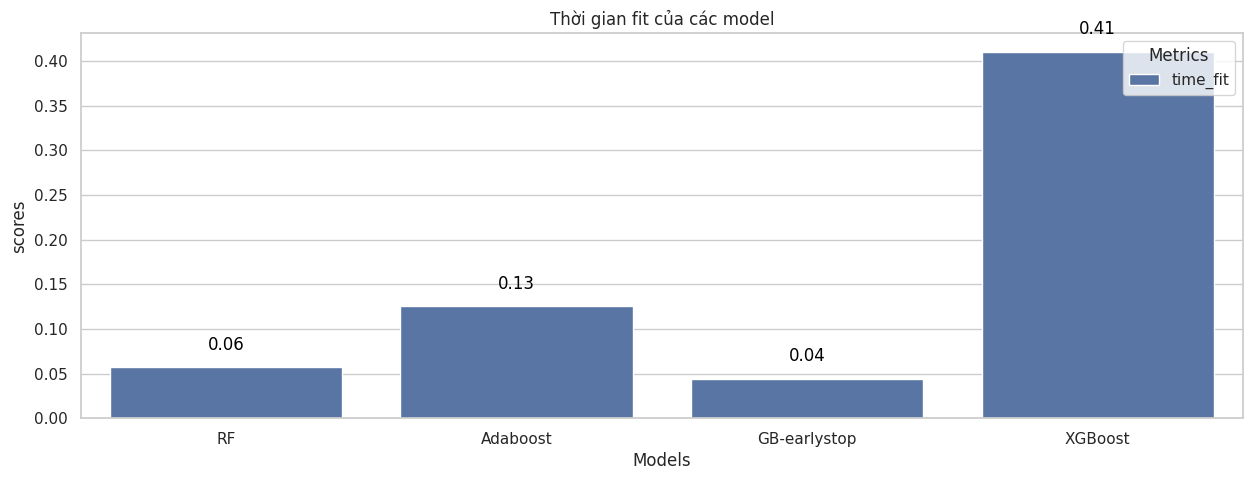

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(15,5))
sns.barplot(data=dftime.melt(id_vars='name', var_name='Metrics', value_name='Values'), x='name', y='Values', hue='Metrics')
for index, row in dftime.iterrows():
    for i, value in enumerate(row[1:]):
        plt.text(index + i * 0.2, value + 0.02, str(round(value, 2)), ha='center', color='black')

plt.xlabel('Models')
plt.ylabel('scores')
plt.title('Thời gian fit của các model')
plt.legend(title='Metrics', loc='upper right')
plt.show()

# 3. Sử dụng Feed Forward Neural Network và Reccurent Neural Network (hoặc mô thuộc loại này) để giải quyết bài toán


In [ ]:
import tensorflow as tf

Feed Forward Neural Network

In [ ]:
# Xây dựng mô hình FFNN
model_ffnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Biên soạn và huấn luyện mô hình FFNN
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Đánh giá mô hình FFNN
loss_ffnn, accuracy_ffnn = model_ffnn.evaluate(X_test, y_test)
print(f"FFNN - Loss: {loss_ffnn}, Accuracy: {accuracy_ffnn}")

9/9 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8359
FFNN - Loss: 0.41173121333122253, Accuracy: 0.8358778357505798


In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Overfitting
# Xây dựng mô hình FFNN có lớp Dropout
model_ffnn_overfitting = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Biên soạn và huấn luyện mô hình FFNN
model_ffnn_overfitting.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_ffnn_overfitting = model_ffnn_overfitting.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
# Đánh giá mô hình FFNN
loss_ffnn_overfitting, accuracy_ffnn_overfitting = model_ffnn_overfitting.evaluate(X_test, y_test)
print(f"FFNN - Loss: {loss_ffnn_overfitting}, Accuracy: {accuracy_ffnn_overfitting}")

9/9 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.8206
FFNN - Loss: 0.4515567421913147, Accuracy: 0.8206107020378113


In [ ]:
# Dự đoán trên tập test
y_pred = model_ffnn_overfitting.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Tính F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"FFNN - F1-score: {f1}")

# Tính Precision
precision = precision_score(y_test, y_pred_classes)
print(f"FFNN - Precision: {precision}")

# Tính Recall
recall = recall_score(y_test, y_pred_classes)
print(f"FFNN - Recall: {recall}")

# Ma trận confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f"Confusion Matrix:\n{conf_matrix}")

9/9 [==============================] - 0s 2ms/step
FFNN - F1-score: 0.7873303167420814
FFNN - Precision: 0.8285714285714286
FFNN - Recall: 0.75
Confusion Matrix:
[[128  18]
 [ 29  87]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from itertools import product

# Các mảng cố định cho siêu tham số
neurons_values = [64, 128, 256]
dropout_rates = [0.1, 0.2, 0.3]

history_ffnn_tmp=[]
count=0
# Lặp qua tất cả các kết hợp của các giá trị siêu tham số
for neurons, dropout_rate in product(neurons_values, dropout_rates):

    # Xây dựng mô hình FFNN với các giá trị siêu tham số
    model_ffnn_tmp = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])

    # Biên soạn mô hình
    model_ffnn_tmp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Huấn luyện mô hình với X_train, y_train và validation với X_test, y_test
    history_ffnn_tmp.append(model_ffnn_tmp.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0))

    # Đánh giá mô hình
    loss_ffnn_tmp, accuracy_ffnn_tmp = model_ffnn_tmp.evaluate(X_test, y_test)
    print(f"{count}. FFNN - Neurons: {neurons}, Dropout Rate: {dropout_rate}, Loss: {loss_ffnn_tmp}, Accuracy: {accuracy_ffnn_tmp}")
    count+=1
    # Dự đoán trên tập test
    y_pred = model_ffnn_tmp.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")

    # Tính F1-score
    f1 = f1_score(y_test, y_pred_classes)
    print(f"FFNN - F1-score: {f1}")

    # Tính Precision
    precision = precision_score(y_test, y_pred_classes)
    print(f"FFNN - Precision: {precision}")

    # Tính Recall
    recall = recall_score(y_test, y_pred_classes)
    print(f"FFNN - Recall: {recall}")

    # Ma trận confusion
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    print(f"Confusion Matrix:\n{conf_matrix}\n")


9/9 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8282
0. FFNN - Neurons: 64, Dropout Rate: 0.1, Loss: 0.3947678506374359, Accuracy: 0.8282442688941956
9/9 [==============================] - 0s 3ms/step
FFNN - F1-score: 0.7945205479452053
FFNN - Precision: 0.8446601941747572
FFNN - Recall: 0.75
Confusion Matrix:
[[130  16]
 [ 29  87]]

9/9 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8321
1. FFNN - Neurons: 64, Dropout Rate: 0.2, Loss: 0.39758968353271484, Accuracy: 0.8320610523223877
9/9 [==============================] - 0s 2ms/step
FFNN - F1-score: 0.8018018018018019
FFNN - Precision: 0.839622641509434
FFNN - Recall: 0.7672413793103449
Confusion Matrix:
[[129  17]
 [ 27  89]]

9/9 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8321
2. FFNN - Neurons: 64, Dropout Rate: 0.3, Loss: 0.3970891833305359, Accuracy: 0.8320610523223877
9/9 [==============================] - 0s 2ms/step
FFNN - F1-score: 

Reccurent Neural Network

In [ ]:
# Xây dựng mô hình RNN
model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Đánh giá mô hình RNN
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print(f"RNN - Loss: {loss_rnn}, Accuracy: {accuracy_rnn}")

9/9 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.8359
RNN - Loss: 0.4350590705871582, Accuracy: 0.8358778357505798


In [ ]:
# from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Overfitting
# Xây dựng mô hình RNN
model_rnn_overfitting = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1), dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_rnn_overfitting.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_rnn_overfitting = model_rnn_overfitting.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)
# history_rnn_overfitting = model_rnn_overfitting.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Đánh giá mô hình RNN
loss_rnn_overfitting, accuracy_rnn_overfitting = model_rnn_overfitting.evaluate(X_test, y_test)
print(f"RNN - Loss: {loss_rnn_overfitting}, Accuracy: {accuracy_rnn_overfitting}")

9/9 [==============================] - 0s 7ms/step - loss: 0.5085 - accuracy: 0.7595
RNN - Loss: 0.5084924697875977, Accuracy: 0.7595419883728027


In [ ]:
# Dự đoán trên tập test
y_pred = model_rnn_overfitting.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Tính F1-score
f1 = f1_score(y_test, y_pred_classes)
print(f"RNN - F1-score: {f1}")

# Tính Precision
precision = precision_score(y_test, y_pred_classes)
print(f"RNN - Precision: {precision}")

# Tính Recall
recall = recall_score(y_test, y_pred_classes)
print(f"RNN - Recall: {recall}")

# Ma trận confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(f"Confusion Matrix:\n{conf_matrix}")

9/9 [==============================] - 0s 7ms/step
RNN - F1-score: 0.676923076923077
RNN - Precision: 0.8354430379746836
RNN - Recall: 0.5689655172413793
Confusion Matrix:
[[133  13]
 [ 50  66]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from itertools import product

# Các mảng cố định cho siêu tham số
neurons_values = [64, 128, 256]
dropout_rates = [0.1, 0.2, 0.3]

history_rnn_tmp=[]
count=0
# Lặp qua tất cả các kết hợp của các giá trị siêu tham số
for neurons, dropout_rate in product(neurons_values, dropout_rates):

    # Xây dựng mô hình FFNN với các giá trị siêu tham số
    model_rnn_tmp = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(neurons, input_shape=(X_train.shape[1], 1), dropout=dropout_rate, recurrent_dropout=dropout_rate),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Biên soạn mô hình
    model_rnn_tmp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Huấn luyện mô hình với X_train, y_train và validation với X_test, y_test
    history_rnn_tmp.append(model_rnn_tmp.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0))

    # Đánh giá mô hình
    loss_rnn_tmp, accuracy_rnn_tmp = model_rnn_tmp.evaluate(X_test, y_test)
    print(f"{count}. FFNN - Neurons: {neurons}, Dropout Rate: {dropout_rate}, Loss: {loss_rnn_tmp}, Accuracy: {accuracy_rnn_tmp}")
    count+=1

    # Dự đoán trên tập test
    y_pred = model_rnn_tmp.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")

    # Tính F1-score
    f1 = f1_score(y_test, y_pred_classes)
    print(f"FFNN - F1-score: {f1}")

    # Tính Precision
    precision = precision_score(y_test, y_pred_classes)
    print(f"FFNN - Precision: {precision}")

    # Tính Recall
    recall = recall_score(y_test, y_pred_classes)
    print(f"FFNN - Recall: {recall}")

    # Ma trận confusion
    conf_matrix = confusion_matrix(y_test, y_pred_classes)
    print(f"Confusion Matrix:\n{conf_matrix}\n")


9/9 [==============================] - 0s 5ms/step - loss: 0.4542 - accuracy: 0.8168
0. FFNN - Neurons: 64, Dropout Rate: 0.1, Loss: 0.4542247951030731, Accuracy: 0.8167939186096191
9/9 [==============================] - 0s 4ms/step
FFNN - F1-score: 0.7857142857142857
FFNN - Precision: 0.8148148148148148
FFNN - Recall: 0.7586206896551724
Confusion Matrix:
[[126  20]
 [ 28  88]]

9/9 [==============================] - 0s 5ms/step - loss: 0.4509 - accuracy: 0.8206
1. FFNN - Neurons: 64, Dropout Rate: 0.2, Loss: 0.4509372413158417, Accuracy: 0.8206107020378113
9/9 [==============================] - 0s 4ms/step
FFNN - F1-score: 0.7911111111111111
FFNN - Precision: 0.8165137614678899
FFNN - Recall: 0.7672413793103449
Confusion Matrix:
[[126  20]
 [ 27  89]]

9/9 [==============================] - 0s 5ms/step - loss: 0.5036 - accuracy: 0.7824
2. FFNN - Neurons: 64, Dropout Rate: 0.3, Loss: 0.50363689661026, Accuracy: 0.7824427485466003
9/9 [==============================] - 0s 4ms/step
FFNN 

Graph

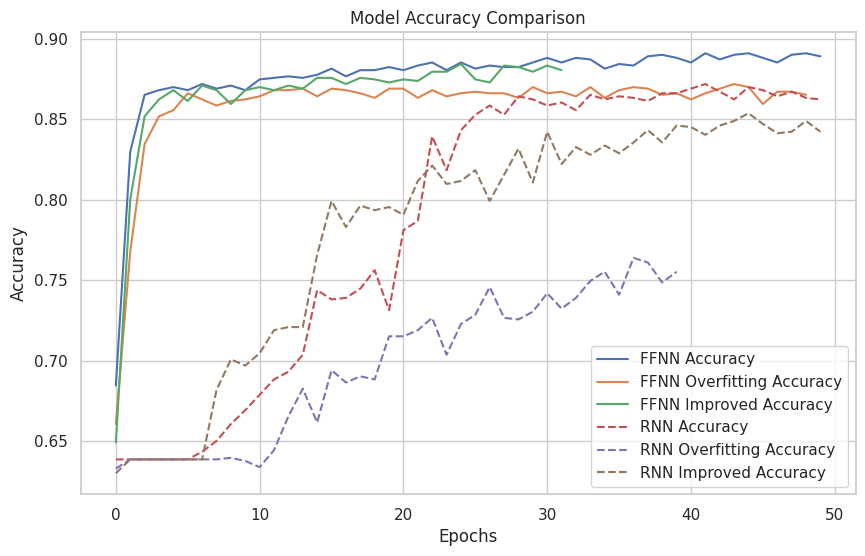

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ so sánh
plt.figure(figsize=(10, 6))

plt.plot(history_ffnn.history['accuracy'], label='FFNN Accuracy', linestyle='solid')
plt.plot(history_ffnn_overfitting.history['accuracy'], label='FFNN Overfitting Accuracy', linestyle='solid')
plt.plot(history_ffnn_tmp[0].history['accuracy'], label='FFNN Improved Accuracy', linestyle='solid')
plt.plot(history_rnn.history['accuracy'], label='RNN Accuracy', linestyle='dashed')
plt.plot(history_rnn_overfitting.history['accuracy'], label='RNN Overfitting Accuracy', linestyle='dashed')
plt.plot(history_rnn_tmp[6].history['accuracy'], label='RNN Improved Accuracy', linestyle='dashed')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. Sau khi huấn luyện xong mô hình thì muốn cải thiện độ chính xác, ta sẽ làm gì để giải quyết nó? Phân tích các trường hợp sai, đề ra giải pháp và thực hiện nó, sau đó đánh giá xem có cải tiến so với trước không.
## **5.1. Một số cách cải thiện độ chính xác trên mô hình:**

## 1. Thêm Dữ Liệu:

- **Ứng Dụng:** Cung cấp thêm dữ liệu đa dạng và đại diện chính xác cho bài toán.
  
- **Ví Dụ:** Nếu mô hình dự đoán hình ảnh, thêm ảnh từ nhiều góc độ, đa dạng ánh sáng và điều kiện để mô hình học được các biến thể.

## 2. Tinh chỉnh Tham Số:

- **Ứng Dụng:** Điều chỉnh các tham số mô hình để tối ưu hóa hiệu suất trên dữ liệu kiểm thử.

- **Ví Dụ:** Thay đổi số lượng lớp, tốc độ học, kích thước batch, hoặc các tham số khác của mô hình để tìm giá trị tối ưu.

## 3. Chuẩn Hóa Dữ Liệu:

- **Ứng Dụng:** Đảm bảo rằng dữ liệu đầu vào được chuẩn hóa để giảm ảnh hưởng của giá trị ngoại lai và đồng nhất thang đo.

- **Ví Dụ:** Sử dụng kỹ thuật chuẩn hóa Z-score hoặc Min-Max để đưa dữ liệu về phạm vi tiêu chuẩn.

## 4. Kiểm Tra và Xử Lý Giá Trị Ngoại Lai:

- **Ứng Dụng:** Phát hiện và xử lý các giá trị ngoại lai có thể gây ảnh hưởng đến hiệu suất của mô hình.

- **Ví Dụ:** Sử dụng kỹ thuật như IQR (phạm vi tương quan) để xác định và loại bỏ giá trị ngoại lai.

## 5. Kiểm Tra và Xử Lý Mất Cân Bằng Dữ Liệu:

- **Ứng Dụng:** Đảm bảo rằng mô hình không bị ảnh hưởng quá mức bởi sự mất cân bằng giữa các lớp.

- **Ví Dụ:** Sử dụng kỹ thuật tái cân bằng lớp hoặc chấp nhận các trọng số lớp trong quá trình huấn luyện.

## 6. Sử Dụng Kỹ Thuật Ensemble:

- **Ứng Dụng:** Kết hợp dự đoán từ nhiều mô hình để tạo ra một dự đoán cuối cùng có độ chính xác cao hơn.

- **Ví Dụ:** Sử dụng phương pháp như Random Forest, Gradient Boosting, hoặc Stacking để kết hợp các mô hình khác nhau.

## 7. Thực Hiện Cross-Validation:

- **Ứng Dụng:** Đánh giá hiệu suất của mô hình trên nhiều tập dữ liệu kiểm thử khác nhau để đảm bảo tính tổng quát và tránh overfitting.

- **Ví Dụ:** Sử dụng kỹ thuật như K-fold cross-validation để đánh giá hiệu suất của mô hình.

## 8. Kiểm Soát Overfitting:

- **Ứng Dụng:** Đảm bảo mô hình không quá mức phức tạp và không học quá mức từ dữ liệu huấn luyện.

- **Ví Dụ:** Sử dụng kỹ thuật như giảm độ sâu cây trong các mô hình cây quyết định hoặc thêm các hạng mục giả mạo để giảm sự phức tạp.

## 9. Thực Hiện Hyperparameter Tuning:

- **Ứng Dụng:** Tối ưu hóa các siêu tham số của mô hình để đạt được hiệu suất tốt nhất.

- **Ví Dụ:** Sử dụng tìm kiếm lưới hoặc tối ưu hóa Bayesian để tìm giá trị tối ưu của các siêu tham số.  


###Tất cả những cách cải thiện trên, đã được thực hiện trên tất cả demo trên.



## **5.2 Tiến hành demo với thuật toán AdaBoost Decision tree khi sử dụng Model bình thường với khi lựa chọn tham số tối ưu cho Decision Tree và áp dụng Early Stopping**
## **5.2.1 Tạo một model bình thường, không áp dụng các phương pháp tối ưu**



In [ ]:
# Khởi tạo và huấn luyện mô hình AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
predictions = ada_model.predict(X_test)
# Tính toán độ chính xác
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8129770992366412



## **5.2.2. Tạo model và tăng độ chính xác bằng cách lựa chọn tham số tốt nhất**



### Tạo DecisionTree và cho vào vòng lặp chọn các tham số tối ưu

In [ ]:
DT = DecisionTreeClassifier()
random_grid_DT = randomSearchDT()
DT = RandomizedSearchCV(estimator = DT, param_distributions = random_grid_DT, n_iter = 10, cv = 5, verbose=True, random_state=42, n_jobs = -1)
DT.fit(xtrainmini, ytrainmini)
save_best_DT = pd.DataFrame(DT.cv_results_)
save_best_DT.loc[(save_best_DT['rank_test_score']<5)]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_leaf_nodes,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.005187,0.000441,0.003594,0.000499,10,4,82,entropy,"{'min_samples_split': 10, 'max_leaf_nodes': 4,...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2
5,0.006237,0.001635,0.005550,0.001736,11,10,1,gini,"{'min_samples_split': 11, 'max_leaf_nodes': 10...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2
6,0.004776,0.000163,0.003169,0.000037,6,8,82,gini,"{'min_samples_split': 6, 'max_leaf_nodes': 8, ...",0.865,0.86,0.825,0.890,0.86,0.860,0.020736,1
8,0.005062,0.000196,0.003444,0.000179,10,7,55,gini,"{'min_samples_split': 10, 'max_leaf_nodes': 7,...",0.855,0.86,0.825,0.890,0.86,0.858,0.020640,2
9,0.007791,0.002640,0.005971,0.002285,5,8,1,gini,"{'min_samples_split': 5, 'max_leaf_nodes': 8, ...",0.855,0.87,0.830,0.875,0.86,0.858,0.015684,2


In [ ]:
DT = DecisionTreeClassifier(min_samples_split=10, max_leaf_nodes=7, max_depth=55, criterion="gini")

lr = [0.0001, 0.001, 0.01, 0.1, 1.0]
ne = [50, 100, 200, 300, 400]

best_accuracy = 0
best_lr = 0
best_ne = 0

for i in lr:
    for j in ne:
        adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=j, random_state=1, learning_rate=i)
        adaboost_clf_DT = adaboost_clf_DT.fit(xtrain, ytrain)
        adaboost_predict = adaboost_clf_DT.predict(xtest)
        adaboostscore2 = scoreDF(ytest, adaboost_predict, 'd', 1)
        print(adaboostscore2)
        accuracy = adaboostscore2['accuracy'].mean()
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = i
            best_ne = j

print("Best combination:")
print("Learning Rate:", best_lr)
print("Number of Estimators:", best_ne)
print("Best Mean Accuracy:", best_accuracy)

  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.822858  0.83034       1.0
  name  accuracy  precision    recall       f1  time fit
0    d  0.843511   0.842868  0.

### Train mô hình từ các tham số đã chọn được

In [ ]:
start_time_adaboost = time.time()
adaboost_clf_DT = AdaBoostClassifier(estimator=DT, n_estimators=best_ne,random_state=1,learning_rate=best_lr)
adaboost_clf_DT=adaboost_clf_DT.fit(xtrain,ytrain)
end_time_adaboost = time.time()
training_time_adaboost = end_time_adaboost-start_time_adaboost
adaboost_predict = adaboost_clf_DT.predict(xtest)
adaboostscore = scoreDF(ytest,adaboost_predict,'Adaboost',training_time_adaboost)
# print(adaboostscore)
accuracy_bp = adaboostscore['accuracy'].mean()
print(f'Accuracy: {accuracy_bp}')

Accuracy: 0.8473282442748091


## **5.2.2. Tạo model và ngăn chặn overfitting bằng Early Stopping**



In [ ]:
best_iteration = 0
best_score = 0
tolerance = 20  # Số lượng vòng lặp không cải thiện trước khi dừng
ab = AdaBoostClassifier(estimator=DT,random_state=1,learning_rate=best_lr)

for i in range(1, 1000):  # Vòng lặp tối đa
    ab.n_estimators = i
    start=time.time()
    ab.fit(xtrain, ytrain)
    end=time.time()
    traintime=end-start
    y_pred = ab.predict(xtest)
    score = accuracy_score(ytest, y_pred)

    if score > best_score:
        best_score = score
        best_iteration = i
        tolerance = 10  # Reset tolerance
    else:
        tolerance -= 1

    if tolerance == 0:
      score = scoreDF(ytest,y_pred,'Adaboost',traintime)
      # print(score)
      break

# print(f"Best Iteration: {best_iteration}, Best Score: {best_score}")
accuracy_es = best_score
print(f'Accuracy: {accuracy_es}')


Accuracy: 0.8435114503816794


## **5.2.4. Tạo model và ngăn chặn overfitting bằng Early Stopping**



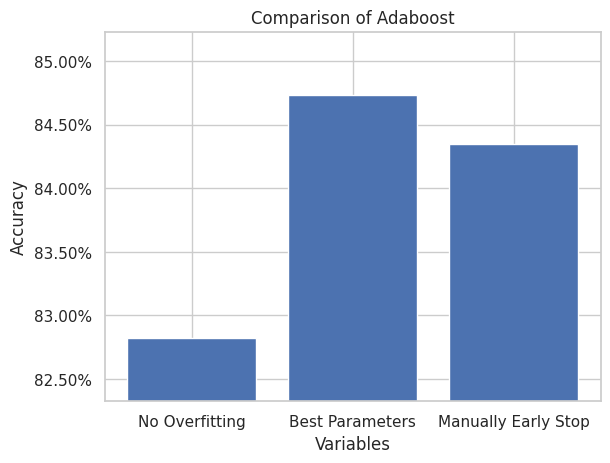

In [ ]:
# Variable names
variables = ['No Overfitting', 'Best Parameters', 'Manually Early Stop']

# Variable values
accuracies = [accuracy * 100, accuracy_bp * 100, accuracy_es * 100]

# Plotting the bar chart
plt.bar(variables, accuracies)
plt.xlabel('Variables')
plt.ylabel('Accuracy')
plt.title('Comparison of Adaboost')
plt.grid(True)

# Adjusting y-axis limits
plt.ylim(min(accuracies) - 0.5, max(accuracies) + 0.5)

# Adding precision to y-axis labels
plt.gca().yaxis.set_major_formatter('{:.2f}%'.format)

plt.show()